In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")


In [64]:
df=pd.read_csv("Mall_Customers.csv")
print(f"shape={df.shape}\nSize={df.size}")

shape=(200, 5)
Size=1000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [66]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [67]:
df.duplicated().sum()

0

In [68]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: >

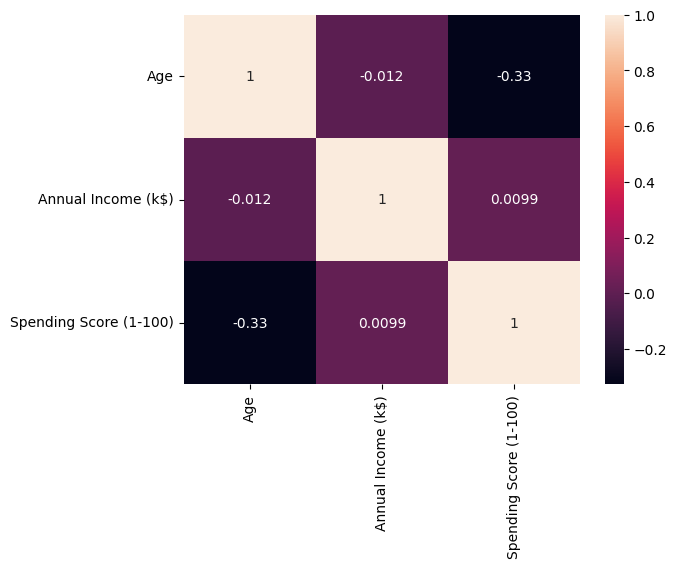

In [70]:
df_num=df.select_dtypes(include="number").drop(["CustomerID"],axis=1)
cor=df_num.corr()
sns.heatmap(cor,annot=True)

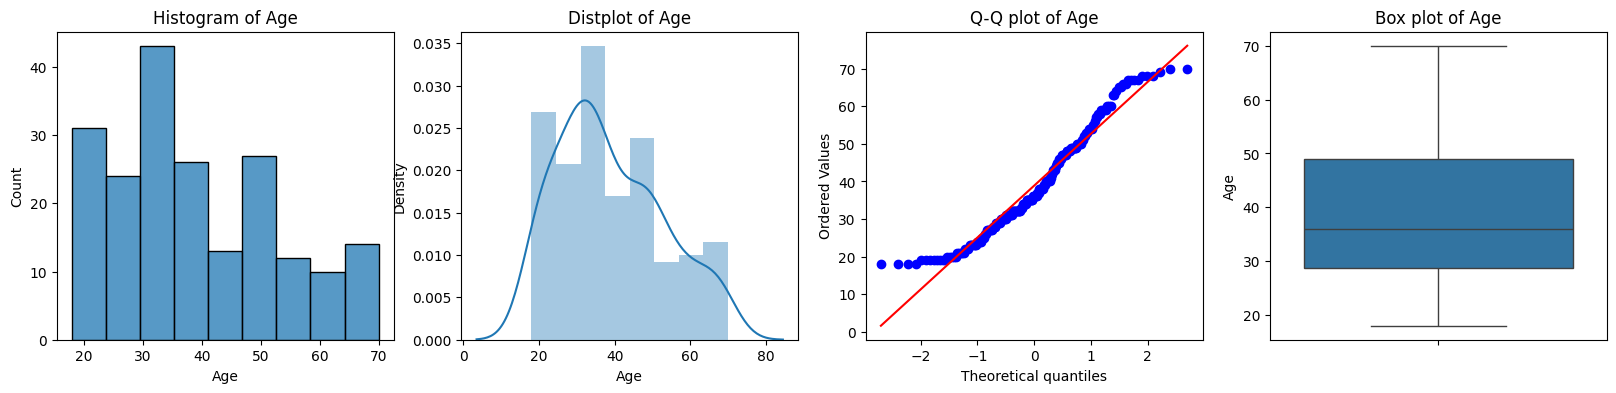

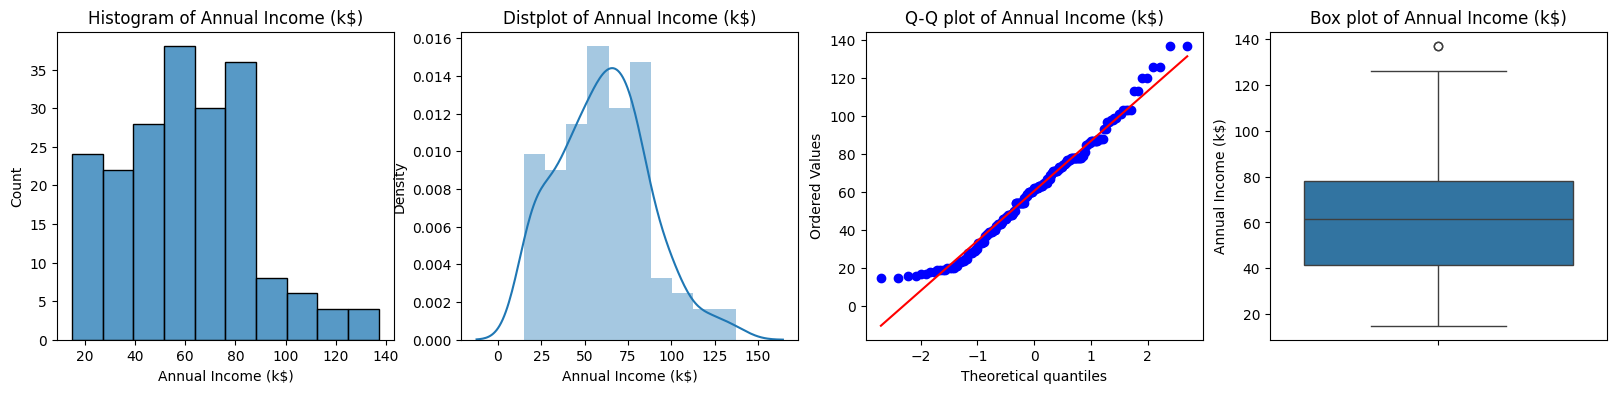

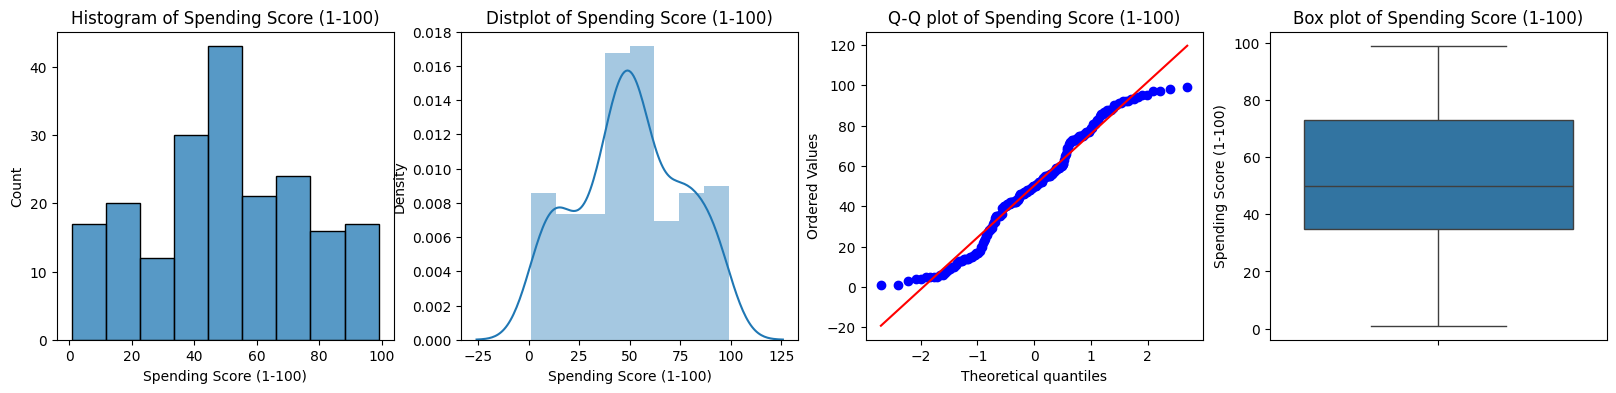

In [71]:
for i in df_num:
  plt.figure(figsize=(20,4))
  plt.subplot(141)
  sns.histplot(df[i])
  plt.title(f"Histogram of {i}")

  plt.subplot(142)
  sns.distplot(df[i])
  plt.title(f"Distplot of {i}")

  plt.subplot(143)
  sts.probplot(df[i],plot=plt)
  plt.title(f"Q-Q plot of {i}")

  plt.subplot(144)
  sns.boxplot(df[i])
  plt.title(f"Box plot of {i}")

In [72]:
for i in df_num.columns:
  print(f"The Skewness of {i} is {round(df[i].skew(),3)}")

The Skewness of Age is 0.486
The Skewness of Annual Income (k$) is 0.322
The Skewness of Spending Score (1-100) is -0.047


<Axes: ylabel='count'>

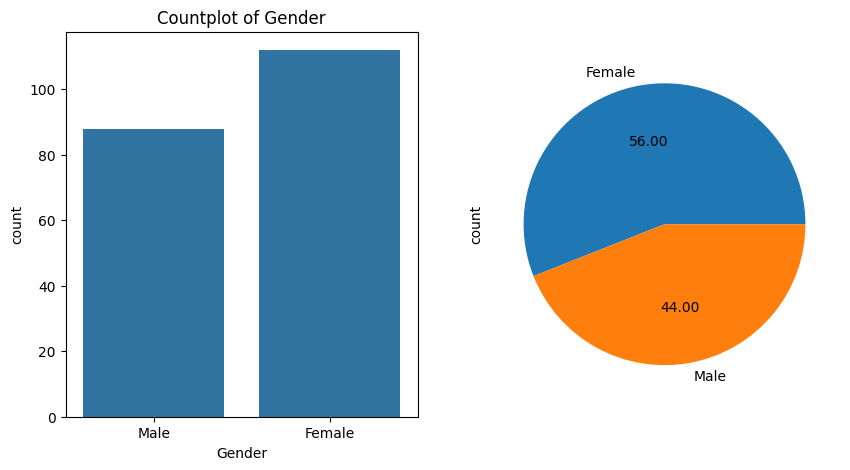

In [73]:
plt.figure(figsize=(10,5))
plt.subplot(121)
_=sns.countplot(df,x="Gender")
plt.title("Countplot of Gender")

plt.subplot(122)
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f")

In [74]:
from re import I
def remove_outlier(df,i):
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower_lim=Q1-1.5*IQR
  upper_lim=Q3+1.5*IQR
  df=df[(df[i]>=lower_lim) & (df[i]<=upper_lim)]
  df.reset_index(drop=True,inplace=True)
  return df

df_filt=remove_outlier(df,"Annual Income (k$)")

<Axes: >

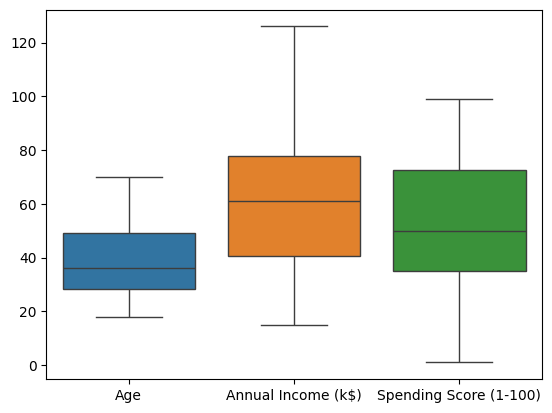

In [75]:
sns.boxplot(df_filt.drop([df.columns[0]],axis=1))

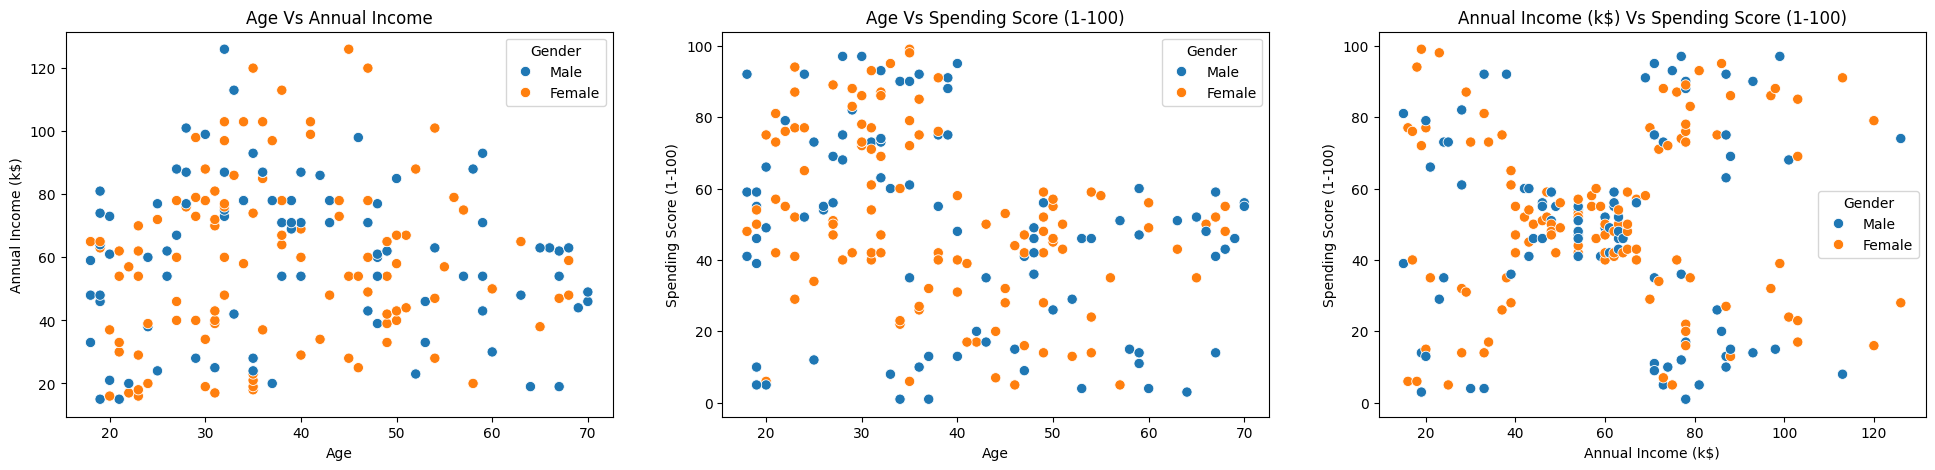

In [76]:
plt.figure(figsize=(24,5))
plt.subplot(131)
_=sns.scatterplot(x="Age",y="Annual Income (k$)",data=df_filt,s=55,hue="Gender")
_=plt.title("Age Vs Annual Income")

plt.subplot(132)
_=sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df_filt,s=55,hue="Gender")
_=plt.title("Age Vs Spending Score (1-100)")

plt.subplot(133)
_=sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df_filt,s=55,hue="Gender")
_=plt.title("Annual Income (k$) Vs Spending Score (1-100)")

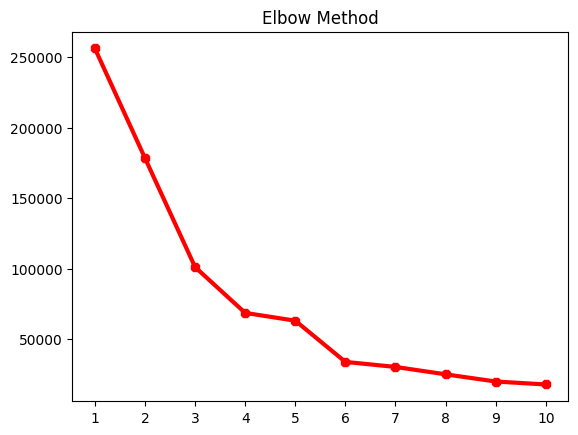

In [77]:
X1=df_filt[["Annual Income (k$)","Spending Score (1-100)"]]
from sklearn.cluster import KMeans
sse=[]
k_range=range(1,11)
for i in k_range:
  km=KMeans(n_clusters=i)
  km.fit_predict(X1)
  sse.append(km.inertia_)

plt.plot(k_range,sse,linewidth=3,color="red",marker="8")
_=plt.xticks(np.arange(1,11))
_=plt.title("Elbow Method")

In [78]:
km1=KMeans(n_clusters=5)
Label_1=pd.DataFrame(km1.fit_predict(X1),columns=["Lables"])
df_labled_1=pd.concat([df_filt,Label_1],axis=1)
df_labled_1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Lables
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
193,194,Female,38,113,91,2
194,195,Female,47,120,16,1
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1


In [79]:
import plotly.express as px
df_labled_1_trf=df_labled_1["Lables"].astype(str)
fig = px.scatter(x=df_labled_1["Annual Income (k$)"],
                 y=df_labled_1["Spending Score (1-100)"],
                 color=df_labled_1["Lables"],
                 color_discrete_sequence=px.colors.qualitative.G10,labels={"x":"Annual Income(k$)","y":"Spending Score"})
fig.show()

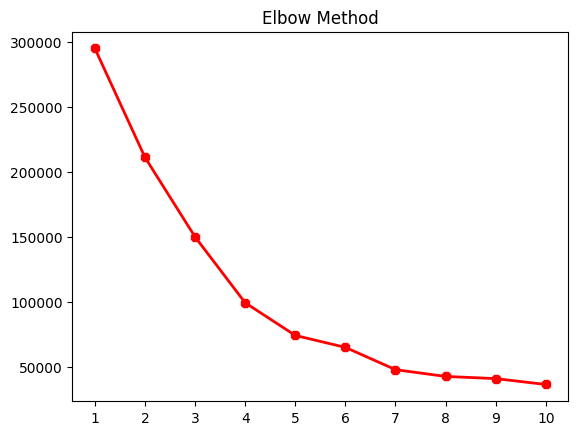

In [80]:
X2=df_filt[["Age","Annual Income (k$)","Spending Score (1-100)"]]
k_range1=range(1,11)
sse1=[]
for i in k_range1:
  km1=KMeans(n_clusters=i)
  km1.fit_predict(X2)
  sse1.append(km1.inertia_)

plt.plot(k_range,sse1,marker="8",linewidth=2,color="red")
_=plt.xticks(np.arange(1,11))
_=plt.title("Elbow Method")

In [81]:
km2=KMeans(n_clusters=6)
labled_2=pd.DataFrame(km2.fit_predict(X2),columns=["Lables"])
df_labled_2=pd.concat([df_filt,labled_2],axis=1)
df_labled_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Lables
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


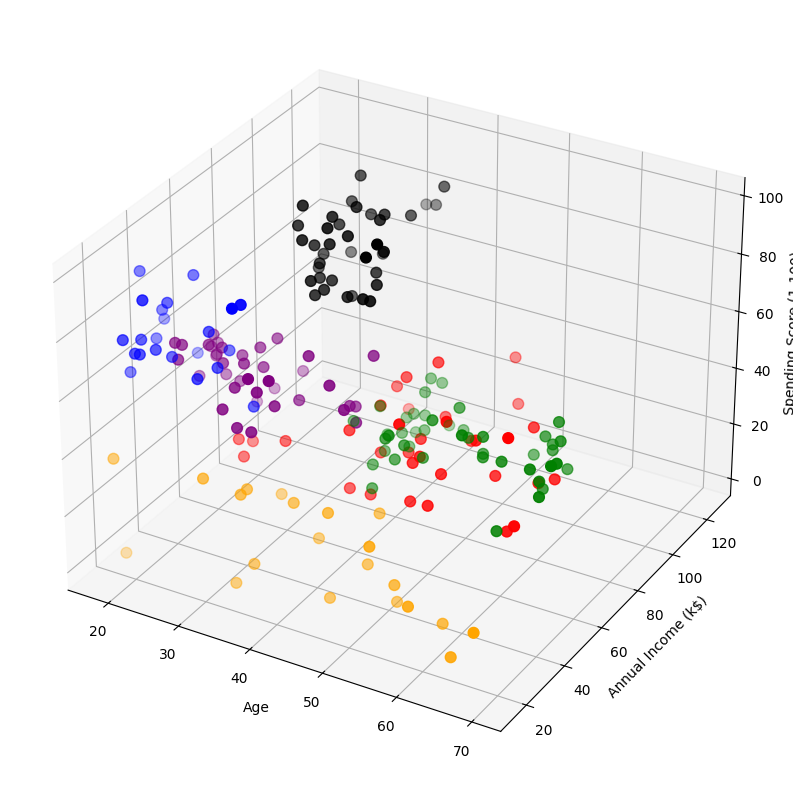

In [82]:
df_6=df_labled_2[(df_labled_2["Lables"]==0)]
df_7=df_labled_2[(df_labled_2["Lables"]==1)]
df_8=df_labled_2[(df_labled_2["Lables"]==2)]
df_9=df_labled_2[(df_labled_2["Lables"]==3)]
df_10=df_labled_2[(df_labled_2["Lables"]==4)]
df_11=df_labled_2[(df_labled_2["Lables"]==5)]

fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_6["Age"],df_6["Annual Income (k$)"],df_6["Spending Score (1-100)"],c='purple', s=60)
ax.scatter(df_7["Age"],df_7["Annual Income (k$)"],df_7["Spending Score (1-100)"],c='red', s=60)
ax.scatter(df_8["Age"],df_8["Annual Income (k$)"],df_8["Spending Score (1-100)"],c='black', s=60)
ax.scatter(df_9["Age"],df_9["Annual Income (k$)"],df_9["Spending Score (1-100)"],c='green', s=60)
ax.scatter(df_10["Age"],df_10["Annual Income (k$)"],df_10["Spending Score (1-100)"],c='orange', s=60)
ax.scatter(df_11["Age"],df_11["Annual Income (k$)"],df_11["Spending Score (1-100)"],c='blue', s=60)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [83]:
print(f"The number of customers in 1st group are {len(df_6)}")
print(f'Those are: {df_6["CustomerID"].values}')
print()
print(f"The number of customers in 2nd group are {len(df_7)}")
print(f'Those are: {df_7["CustomerID"].values}')
print()
print(f"The number of customers in 3rd group are {len(df_8)}")
print(f'Those are: {df_8["CustomerID"].values}')
print()
print(f"The number of customers in 4th group are {len(df_9)}")
print(f'Those are: {df_9["CustomerID"].values}')
print()
print(f"The number of customers in 5th group are {len(df_10)}")
print(f'Those are: {df_10["CustomerID"].values}')
print()
print(f"The number of customers in 6th group are {len(df_11)}")
print(f'Those are: {df_11["CustomerID"].values}')


The number of customers in 1st group are 38
Those are: [ 44  48  49  50  52  53  59  62  66  69  70  76  78  79  82  85  88  89
  92  94  95  96  98 100 101 104 106 112 113 114 115 116 121 122 123 125
 133 143]

The number of customers in 2nd group are 34
Those are: [127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197]

The number of customers in 3rd group are 38
Those are: [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198]

The number of customers in 4th group are 45
Those are: [ 41  43  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72
  73  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105
 107 108 109 110 111 117 118 119 120]

The number of customers in 5th group are 21
Those are: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 45]

The number of custom